In [1]:
!pip install xgboost
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df=pd.read_csv(r"../Capstone Project 2/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

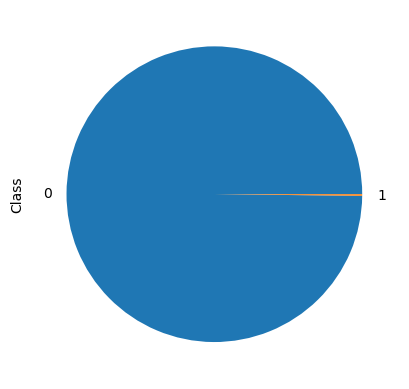

In [8]:
print((df.groupby("Class")["Class"].count()/df["Class"].count())*100)
((df.groupby("Class")["Class"].count()/df["Class"].count())*100).plot.pie()

In [9]:
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


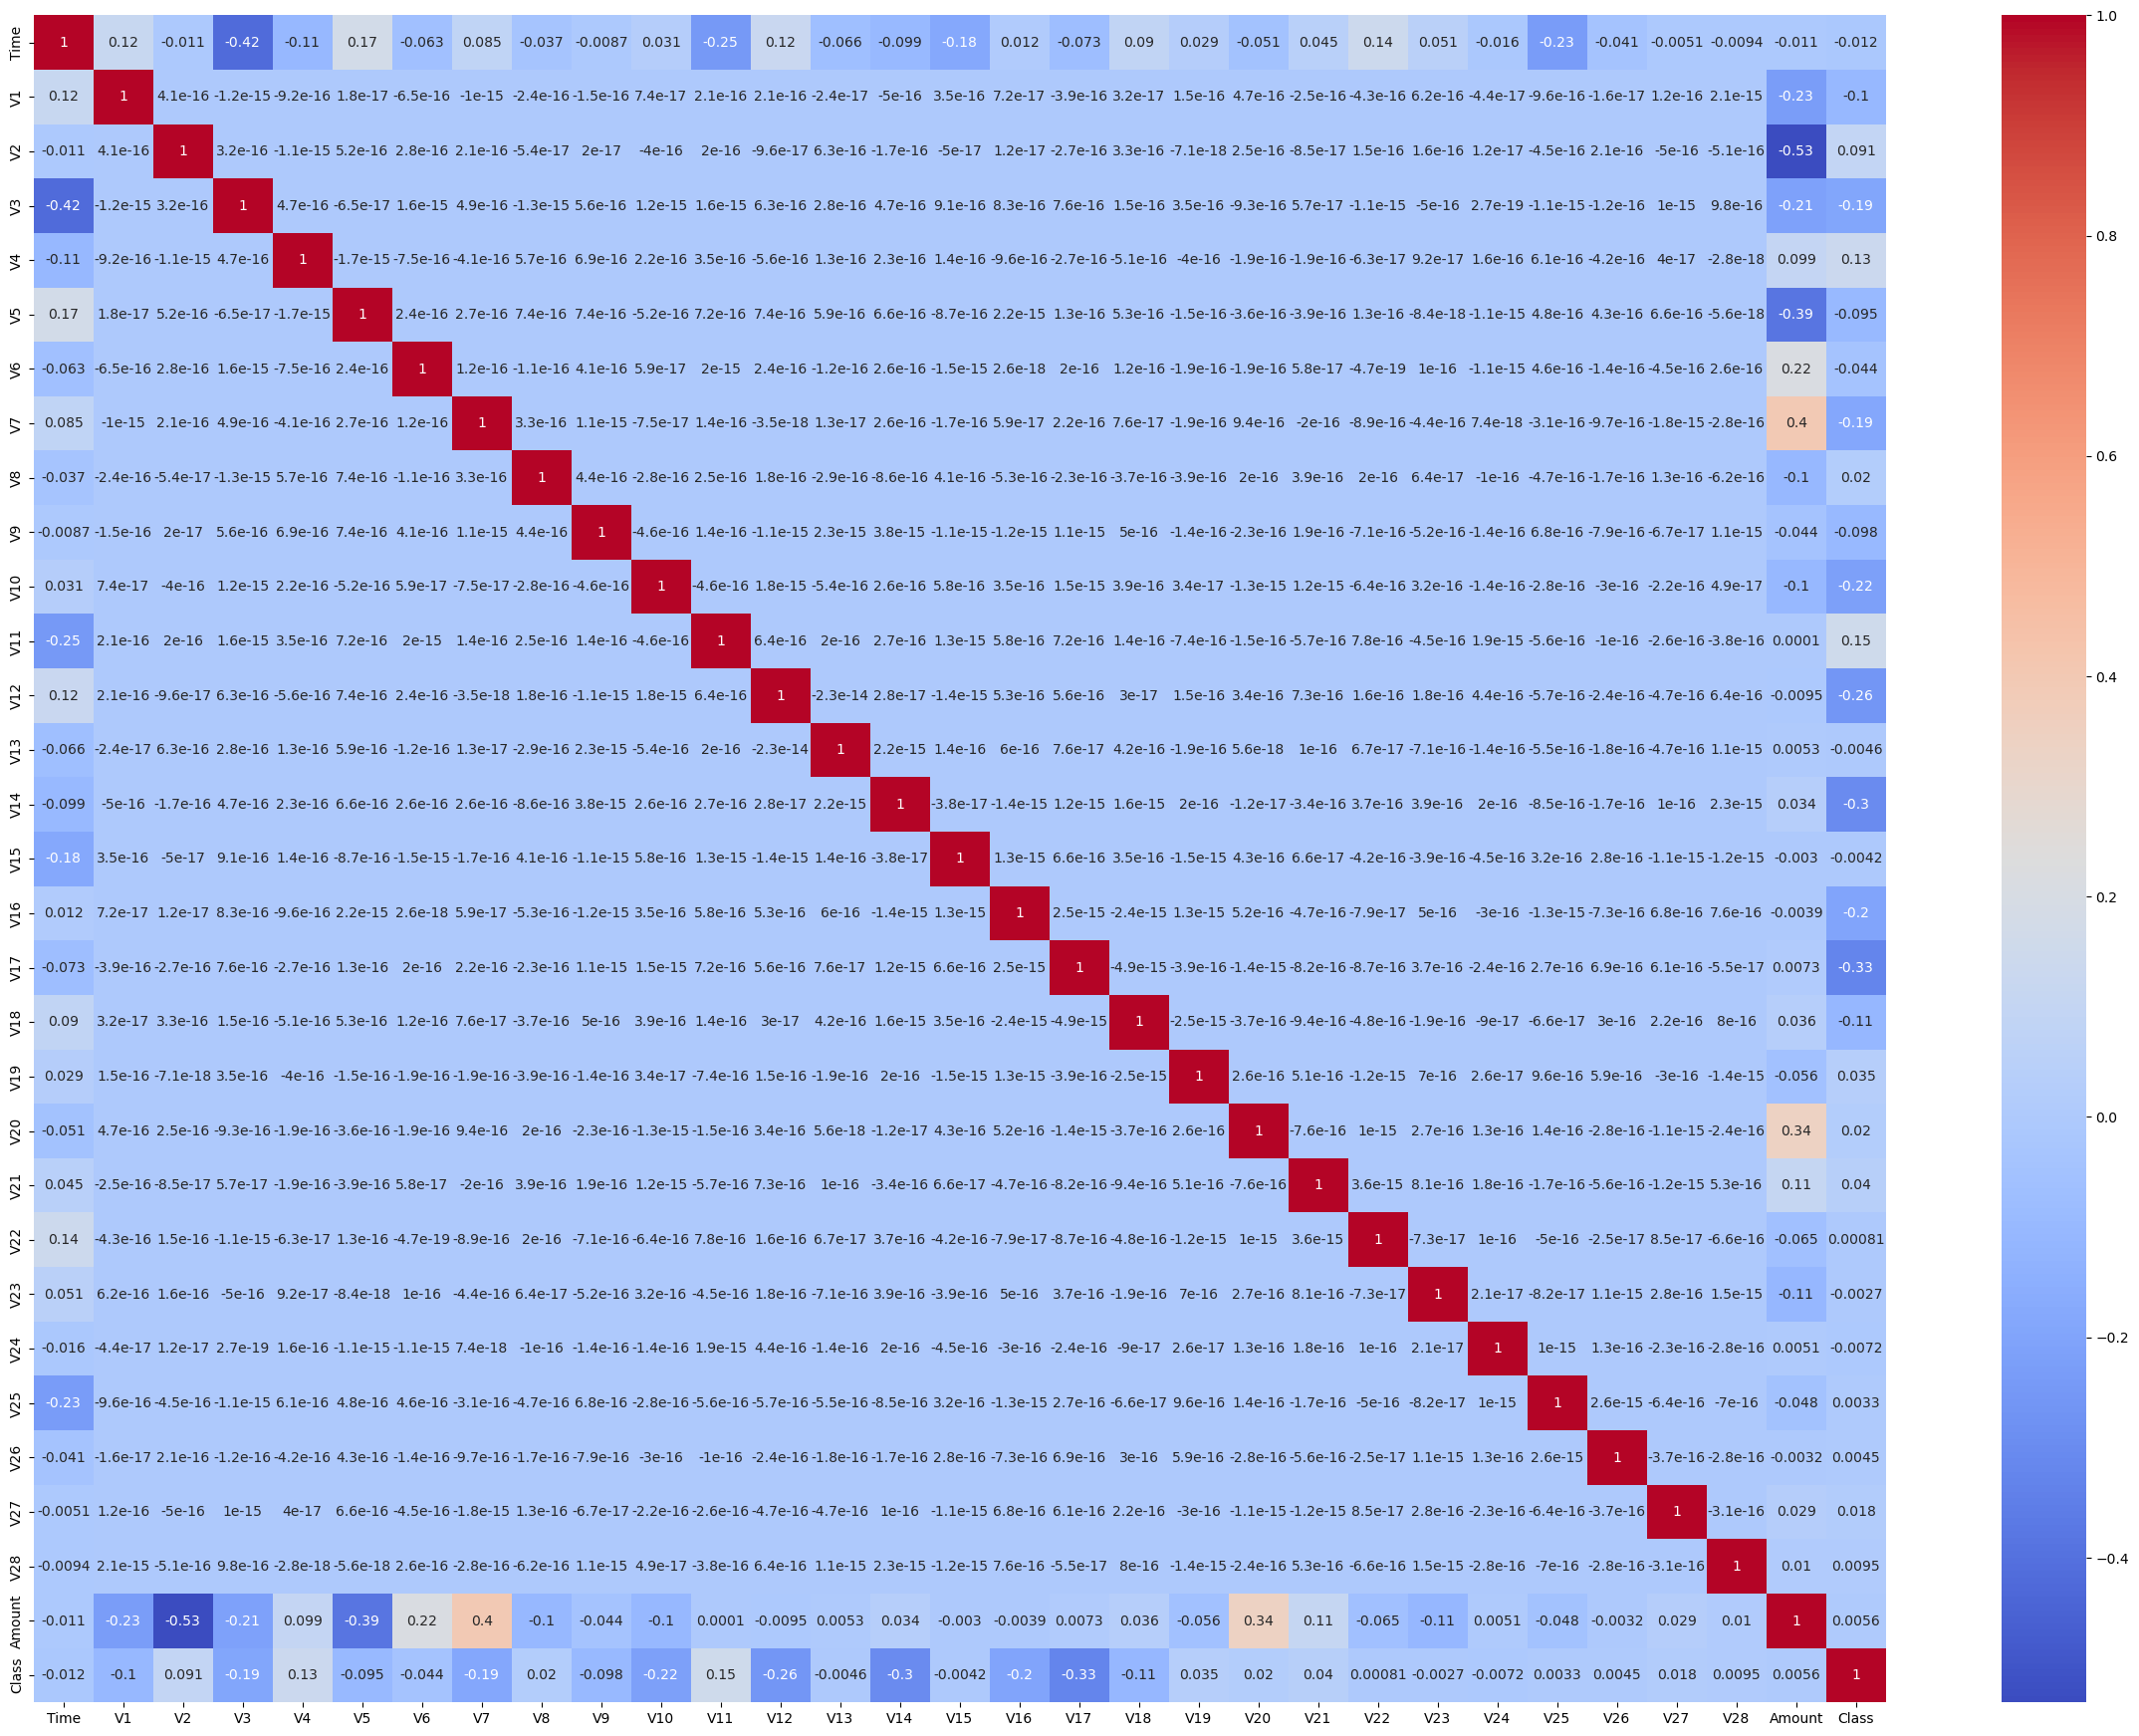

In [10]:
plt.figure(figsize=(30,22))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [11]:
sc = StandardScaler()
df["Amount"]=sc.fit_transform(pd.DataFrame(df["Amount"]))

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
df=df.drop(["Time"], axis=1)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
df.duplicated().any()

True

In [16]:
df=df.drop_duplicates()

In [17]:
df.shape

(275663, 30)

In [18]:
df["Class"].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

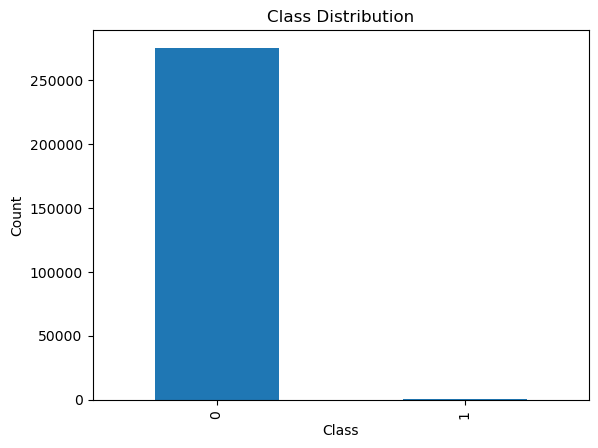

In [19]:
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [20]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
classifier={"Logistic Regression": LogisticRegression(),
            "Decision Tree Classifier": DecisionTreeClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            "XGBoost Classifier": XGBClassifier()}
for name, clf in classifier.items():
    print(f"\n==========={name}=============")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 score: {f1_score(y_test, y_pred)}")


===========Logistic Regression=============

 Accuracy: 0.9992563437505668

 Precision: 0.890625

 Recall: 0.6263736263736264

 F1 score: 0.7354838709677419

===========Decision Tree Classifier=============

 Accuracy: 0.9989842743910181

 Precision: 0.6804123711340206

 Recall: 0.7252747252747253

 F1 score: 0.7021276595744681

===========KNeighbors Classifier=============

 Accuracy: 0.999419585366296

 Precision: 0.8831168831168831

 Recall: 0.7472527472527473

 F1 score: 0.8095238095238095

===========RandomForest Classifier=============

 Accuracy: 0.999419585366296

 Precision: 0.9041095890410958

 Recall: 0.7252747252747253

 F1 score: 0.8048780487804879

===========XGBoost Classifier=============

 Accuracy: 0.9995465510674187

 Precision: 0.9459459459459459

 Recall: 0.7692307692307693

 F1 score: 0.8484848484848485


In [23]:
##UNDER SAMPLING##

In [24]:
normal=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [25]:
normal.shape

(275190, 30)

In [26]:
fraud.shape

(473, 30)

In [27]:
normal_sample=normal.sample(n=473)

In [28]:
normal_sample.shape

(473, 30)

In [29]:
new_data=pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.991316,-0.515118,-2.782424,-0.837821,0.464566,-1.563785,0.832047,-0.460958,0.432059,-0.019126,...,0.322099,0.835115,-0.280878,-0.307708,0.528043,1.074989,-0.179437,-0.104035,0.014595,0
1,-9.305613,-5.190543,-3.096291,-1.359925,-0.614056,1.783862,1.739379,-0.779366,3.408895,1.030068,...,-1.722626,1.742503,1.631108,-0.650029,0.789321,-0.094913,-2.339718,1.129211,1.070369,0
2,1.518334,-0.956920,-0.498684,-1.708495,-0.597479,-0.316279,-0.555302,-0.170220,-2.368379,1.610357,...,-0.509894,-1.237649,-0.034605,-0.897688,0.452648,-0.398018,-0.008757,-0.000475,-0.157643,0
3,0.176614,-0.123692,1.125705,-2.747124,-0.357745,-0.660308,0.213374,-0.231304,3.290971,-2.014628,...,0.215859,1.308656,-0.234489,-0.000750,-0.229178,-0.815292,-0.036357,-0.181865,-0.273468,0
4,-0.865676,0.461644,1.723993,-1.605546,0.333924,-0.708617,1.074796,-0.426188,0.930180,-0.332380,...,-0.367999,-0.714471,0.016123,-0.169693,-0.403449,-0.002115,-0.291313,-0.263860,-0.269310,0


In [31]:
new_data["Class"].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [32]:
X=new_data.drop("Class",axis=1)
y=new_data["Class"]

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
classifier={"Logistic Regression": LogisticRegression(),
            "Decision Tree Classifier": DecisionTreeClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            "XGBoost Classifier": XGBClassifier()}
for name, clf in classifier.items():
    print(f"\n==========={name}=============")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 score: {f1_score(y_test, y_pred)}")


===========Logistic Regression=============

 Accuracy: 0.9421052631578948

 Precision: 0.9789473684210527

 Recall: 0.9117647058823529

 F1 score: 0.9441624365482234

===========Decision Tree Classifier=============

 Accuracy: 0.8736842105263158

 Precision: 0.8482142857142857

 Recall: 0.9313725490196079

 F1 score: 0.8878504672897196

===========KNeighbors Classifier=============

 Accuracy: 0.9263157894736842

 Precision: 0.9680851063829787

 Recall: 0.8921568627450981

 F1 score: 0.9285714285714286

===========RandomForest Classifier=============

 Accuracy: 0.9263157894736842

 Precision: 0.9583333333333334

 Recall: 0.9019607843137255

 F1 score: 0.9292929292929293

===========XGBoost Classifier=============

 Accuracy: 0.9473684210526315

 Precision: 0.9693877551020408

 Recall: 0.9313725490196079

 F1 score: 0.95


In [35]:
##OVER SAMPLING##

In [36]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [37]:
X.shape

(275663, 29)

In [38]:
y.shape

(275663,)

In [39]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [40]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=42)

In [42]:
classifier={"Logistic Regression": LogisticRegression(),
            "Decision Tree Classifier": DecisionTreeClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            "XGBoost Classifier": XGBClassifier()}
for name, clf in classifier.items():
    print(f"\n==========={name}=============")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 score: {f1_score(y_test, y_pred)}")


===========Logistic Regression=============

 Accuracy: 0.9433300628656565

 Precision: 0.9726298241873268

 Recall: 0.9122593313092013

 F1 score: 0.9414777844491143

===========Decision Tree Classifier=============

 Accuracy: 0.9982648352047676

 Precision: 0.9976033117873484

 Recall: 0.998927331236478

 F1 score: 0.998264882493482

===========KNeighbors Classifier=============

 Accuracy: 0.999046113594244

 Precision: 0.998094650504464

 Recall: 1.0

 F1 score: 0.9990464167975952

===========RandomForest Classifier=============

 Accuracy: 0.999918238308078

 Precision: 0.9998363993310551

 Recall: 1.0

 F1 score: 0.9999181929736854

===========XGBoost Classifier=============

 Accuracy: 0.9997002071296195

 Precision: 0.999400392470383

 Recall: 1.0

 F1 score: 0.999700106325939


In [43]:
rfc=RandomForestClassifier()
rfc.fit(X_res,y_res)

RandomForestClassifier()

In [44]:
import joblib
joblib.dump(rfc,"credit_card_model.pkl")

['credit_card_model.pkl']

In [45]:
model=joblib.load("credit_card_model.pkl")

In [46]:
pred=model.predict([[-1.35835406159823, -1.34016307473609, 1.77320934263119, 0.379779593034328, -0.503198133318193, 1.80049938079263, 0.791460956450422, 0.247675786588991, -1.51465432260583, 0.207642865216696, 0.624501459424895, 0.066083685268831, 0.717292731410831, -0.165945922763554, 2.34586494901581, -2.89008319444231, 1.10996937869599, -0.121359313195888, -2.26185709530414, 0.524979725224404, 0.247998153469754, 0.771679401917229, 0.909412262347719, -0.689280956490685, -0.327641833735251, -0.139096571514147, -0.0553527940384261, -0.0597518405929204, 378.66]])

In [47]:
pred[0]

0

In [48]:
if pred[0]==0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


Accuracy: 1.00
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076

Confusion Matrix:
[[55073     0]
 [    0 55003]]


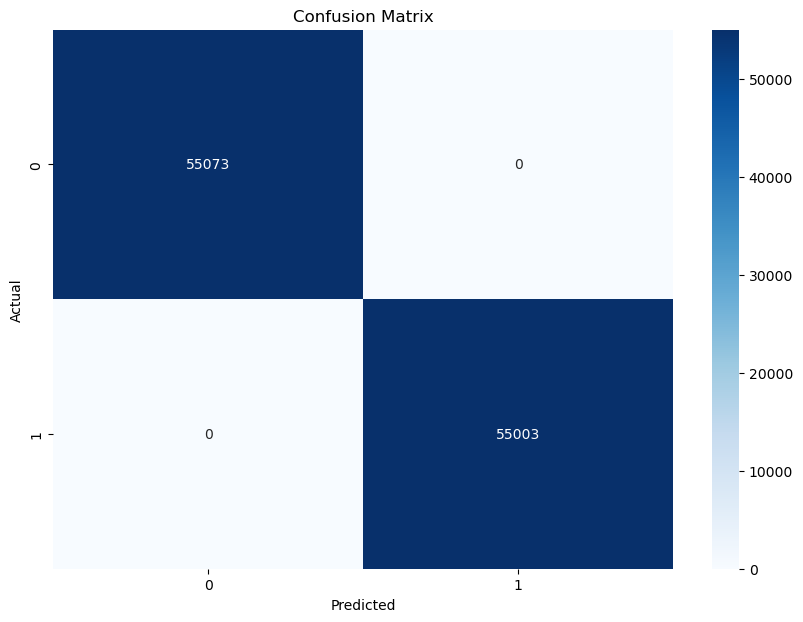

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
AUC: 1.00


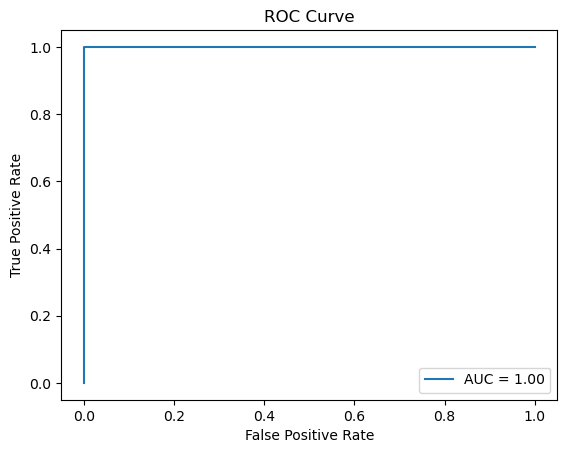

In [49]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Classification Report
    CR=classification_report(y_test, y_pred)
    print("Classification Report")
    print(CR)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    # Calculate ROC and AUC
    auc = roc_auc_score(y_test, y_prob)
    print(f'AUC: {auc:.2f}')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Call the function with your model and test data
evaluate_model(model, X_test, y_test)
